In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Transforming the Sex into 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [6]:
# Fill missing values in age
df['Age'].fillna(df['Age'].median(),inplace=True)

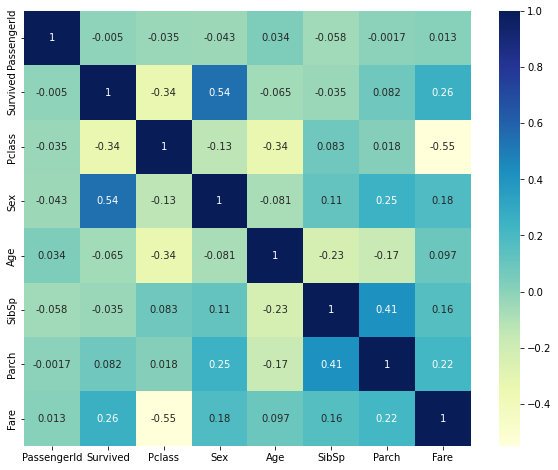

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

<AxesSubplot:xlabel='Sex'>

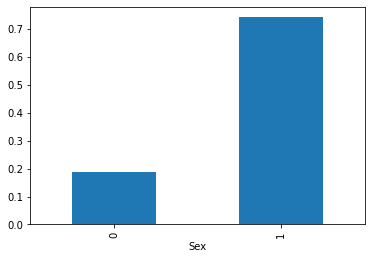

In [8]:
df.groupby('Sex').Survived.mean().plot(kind='bar')

In [18]:
# X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']]
X = df[['Age', 'Sex']]
y = df['Survived']

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [20]:
# Initialize the SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0)

In [21]:
# Train the model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [26]:
# Evaluate the mode
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy = accuracy_score(y_test, y_pred)
accuracy = classifier.score(X_test,y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[93 17]
 [15 54]]


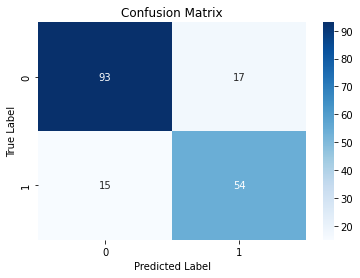

In [25]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.76      0.78      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

